In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools
from collections import Counter
import scipy.stats as st

### Utility Functions

In [3]:
def roll_die(ndie = 5) :
    "This function sample n dice with replacement"
    rolls = np.random.choice(range(1,7), ndie, replace=True)
    rolls.sort()
    return(rolls)
    
roll_die()

array([2, 2, 4, 4, 5])

### Exploratory Data Analysis

#### Odds of rolling a Yahtzee in one roll

In [4]:
N = 100000
yahtzee_rate = np.mean([len(np.unique(roll_die())) == 1 for _ in tqdm(range(N))])
print(f'Yahtzee Rate (per {N} simulations): {yahtzee_rate}')

100%|██████████| 100000/100000 [00:01<00:00, 70640.68it/s]

Yahtzee Rate (per 100000 simulations): 0.00082


#### Odds of rolling a Yahtzee in one turn

In [5]:
import numpy as np
from collections import Counter

def roll_dice(num_dice, verbose=False):
    """Simulate rolling 'num_dice' six-sided dice."""
    roll = np.random.randint(1, 7, size=num_dice)
    if verbose:
        print(roll)
    return roll

def keep_highest_mode(dice, verbose=False):
    """Keep the dice with the highest mode, update the rest to random values."""
    counts = Counter(dice)
    highest_mode = max(counts.values())
    kept_dice = [num for num in dice if counts[num] == highest_mode and highest_mode > 1]
    dice_to_reroll = 5 - len(kept_dice)
    new_dice = [np.random.randint(1, 7) for i in range(dice_to_reroll)]
    dice = [*kept_dice, *new_dice]
    if verbose:
        print('Keepers:', kept_dice, 'New:', new_dice)
    return dice

def roll_yahtzee_odds(num_simulations=10000, verbose=False):
    yahtzee_count = 0
    for _ in range(num_simulations):
        dice = roll_dice(5, verbose=verbose)  # Roll 5 dice
        for _ in range(2):  # Perform 2 additional rolls
            dice = keep_highest_mode(dice, verbose=verbose)
        if len(set(dice)) == 1:  # If all dice are the same, it's a Yahtzee
            yahtzee_count += 1
    yahtzee_probability = yahtzee_count / num_simulations
    return yahtzee_probability

# Run the function to compute the odds
odds = roll_yahtzee_odds(1, verbose=True)
print("Probability of rolling a Yahtzee:", odds)

[2 4 1 5 2]
Keepers: [2, 2] New: [1, 2, 1]
Keepers: [2, 2, 2] New: [5, 2]
Probability of rolling a Yahtzee: 0.0


In [6]:
# Run the function to compute the odds
odds = roll_yahtzee_odds(1000000, verbose=False)
print("Probability of rolling a Yahtzee:", odds)

Probability of rolling a Yahtzee: 0.040579


#### Odds of rolling a straight in one roll

In [7]:
def check_straight(roll, length):
    return sorted(set(roll)) == list(range(min(roll), min(roll) + length))

N = 10000
small_straight_prob = np.sum([check_straight(roll_die(5), 4) for _ in tqdm(range(N))]) / N
large_straight_prob = np.sum([check_straight(roll_die(5), 5) for _ in tqdm(range(N))]) / N

print(f'Probability of rolling a small straight in Yahtzee (per {N} simulations): {small_straight_prob}')
print(f'Probability of rolling a large straight in Yahtzee (per {N} simulations): {large_straight_prob}')

100%|██████████| 10000/10000 [00:00<00:00, 67583.90it/s]

Probability of rolling a small straight in Yahtzee (per 10000 simulations): 0.0925
Probability of rolling a large straight in Yahtzee (per 10000 simulations): 0.033


#### Odds of rolling a straight in one turn

In [8]:
def roll_dice(num_dice, verbose=False):
    """Simulate rolling 'num_dice' six-sided dice."""
    roll = np.random.randint(1, 7, size=num_dice)
    if verbose:
        print(roll)
    return roll

def check_straight(roll, length):
    return sorted(set(roll)) == list(range(min(roll), min(roll) + length))

def partial_straight(roll):
    """Check for the largest partial straight in a list of dice."""
    dice_set = sorted(list(set(roll)))
    for length in [5, 4, 3, 2]:
      for j in range(5 - length + 1):
        subset = dice_set[j:j+length]
        if len(subset) > 0 and subset == list(range(min(subset), min(subset) + length)):
            return subset
    return []

def keep_partial_straight(dice, verbose=False):
    """Keep the dice with the highest mode, update the rest to random values."""
    kept_dice = partial_straight(dice)
    dice_to_reroll = 5 - len(kept_dice)
    new_dice = [np.random.randint(1, 7) for i in range(dice_to_reroll)]
    dice = [*kept_dice, *new_dice]
    if verbose:
        print('Keepers:', kept_dice, 'New:', new_dice)
    return dice

def roll_straight_odds(length, num_simulations=10000, verbose=False):
    straight_count = 0
    for _ in range(num_simulations):
        dice = roll_dice(5, verbose=verbose)  # Roll 5 dice
        for _ in range(2):  # Perform 2 additional rolls
            dice = keep_partial_straight(dice, verbose=verbose)
        if check_straight(dice, length):
            straight_count += 1
    straight_probability = straight_count / num_simulations
    return straight_probability

# Run the function to compute the odds
odds = roll_straight_odds(5, 1, verbose=True)
print("Probability of rolling a large straight in Yahtzee:", odds)

[3 4 2 3 4]
Keepers: [2, 3, 4] New: [2, 4]
Keepers: [2, 3, 4] New: [3, 2]
Probability of rolling a large straight in Yahtzee: 0.0


In [9]:
N = 10000
small_straight_prob = roll_straight_odds(4, N)
large_straight_prob = roll_straight_odds(5, N)
print(f'Probability of rolling a small straight in Yahtzee (per {N} simulations): {small_straight_prob}')
print(f'Probability of rolling a large straight in Yahtzee (per {N} simulations): {large_straight_prob}')

Probability of rolling a small straight in Yahtzee (per 10000 simulations): 0.301
Probability of rolling a large straight in Yahtzee (per 10000 simulations): 0.199


### Yahtzee Game

In [43]:
import random

def roll_dice(num_dice=5):
  return [random.randint(1, 6) for _ in range(num_dice)]

class Yahtzee:
  def __init__(self):
    self.scores = {
      "Ones": None,
      "Twos": None,
      "Threes": None,
      "Fours": None,
      "Fives": None,
      "Sixes": None,
      "Three of a Kind": None,
      "Four of a Kind": None,
      "Full House": None,
      "Small Straight": None,
      "Large Straight": None,
      "Yahtzee": None,
      "Chance": None,
    }
    self.yahtzees = 0
    self.upper_bonus = 0

  def is_full(self):
    return all(value is not None for value in self.scores.values())

  def check_potential_scores(self, roll):
    scores = {}
    if sum([dice for dice in roll if dice == 1]) > 0:
      scores["Ones"] = sum([dice for dice in roll if dice == 1])
    if sum([dice for dice in roll if dice == 2]) > 0:
      scores["Twos"] = sum([dice for dice in roll if dice == 2])
    if sum([dice for dice in roll if dice == 3]) > 0:
      scores["Threes"] = sum([dice for dice in roll if dice == 3])
    if sum([dice for dice in roll if dice == 4]) > 0:
      scores["Fours"] = sum([dice for dice in roll if dice == 4])
    if sum([dice for dice in roll if dice == 5]) > 0:
      scores["Fives"] = sum([dice for dice in roll if dice == 5])
    if sum([dice for dice in roll if dice == 6]) > 0:
      scores["Sixes"] = sum([dice for dice in roll if dice == 6])
    if self._check_n_of_a_kind(roll, 3):
      scores["Three of a Kind"] = sum(roll) if self._check_n_of_a_kind(roll, 3) else 0
    if self._check_n_of_a_kind(roll, 4):
      scores["Four of a Kind"] = sum(roll)
    if self._check_full_house(roll):
      scores["Full House"] = 25
    if self._check_straight(roll, 4):
      scores["Small Straight"] = 30
    if self._check_straight(roll, 5):
      scores["Large Straight"] = 40
    if self._check_n_of_a_kind(roll, 5):
      scores["Yahtzee"] = 50
    scores["Chance"] = sum(roll)
    return scores

  def update_score(self, roll, category):
    if self._check_n_of_a_kind(roll, 5):
      self.yahtzees += 1
    if self.yahtzees > 1 and self._check_n_of_a_kind(roll, 5):
      self.handle_yahtzee_bonus(roll)
    elif category == "Ones":
      self.scores["Ones"] = sum([dice for dice in roll if dice == 1])
    elif category == "Twos":
      self.scores["Twos"] = sum([dice for dice in roll if dice == 2])
    elif category == "Threes":
      self.scores["Threes"] = sum([dice for dice in roll if dice == 3])
    elif category == "Fours":
      self.scores["Fours"] = sum([dice for dice in roll if dice == 4])
    elif category == "Fives":
      self.scores["Fives"] = sum([dice for dice in roll if dice == 5])
    elif category == "Sixes":
      self.scores["Sixes"] = sum([dice for dice in roll if dice == 6])
    elif category == "Three of a Kind":
      self.scores["Three of a Kind"] = sum(roll) if self._check_n_of_a_kind(roll, 3) else 0
    elif category == "Four of a Kind":
      self.scores["Four of a Kind"] = sum(roll) if self._check_n_of_a_kind(roll, 4) else 0
    elif category == "Full House":
      self.scores["Full House"] = 25 if self._check_full_house(roll) else 0
    elif category == "Small Straight":
      self.scores["Small Straight"] = 30 if self._check_straight(roll, 4) else 0
    elif category == "Large Straight":
      self.scores["Large Straight"] = 40 if self._check_straight(roll, 5) else 0
    elif category == "Yahtzee":
      self.scores["Yahtzee"] = 50 if self._check_n_of_a_kind(roll, 5) else 0
    elif category == "Chance":
      self.scores["Chance"] = sum(roll)

  def handle_yahtzee_bonus(self, roll):
    if min(roll) == 1:
      category = "Ones"
    elif min(roll) == 2:
      category = "Twos"
    elif min(roll) == 3:
      category = "Threes"
    elif min(roll) == 4:
      category = "Fours"
    elif min(roll) == 5:
      category = "Fives"
    elif min(roll) == 6:
      category = "Sixes"
    if self.scores[category] is None:
      self.scores[category] = sum([dice for dice in roll if dice == min(roll)])
    else:
      for category in ['Large Straight', 'Small Straight', 'Full House', 'Three of a Kind', 'Four of a Kind']:
        if self.scores[category] is None:
          if category == 'Large Straight':
            self.scores[category] = 40
          elif category == 'Small Straight':
            self.scores[category] = 30
          elif category == 'Full House':
            self.scores[category] = 25
          else:
            self.scores[category] = sum(roll)      

  def get_total_score(self):
    total_score = sum(self.scores.values())
    if self.yahtzees > 1:
      total_score += (self.yahtzees - 1) * 100
    upper_section = sum([self.scores[cat] for cat in ["Ones", "Twos", "Threes", "Fours", "Fives", "Sixes"]])
    if upper_section >= 63:
      self.upper_bonus += 1
      total_score += 35
    return total_score

  def _check_n_of_a_kind(self, roll, n):
    return any(roll.count(value) >= n for value in set(roll))

  def _check_full_house(self, roll):
    unique_values, counts = np.unique(roll, return_counts=True)
    # Check if there are exactly two unique values (three of one number and two of another)
    if len(unique_values) == 2:
        # Check if counts are either 2 and 3, or 3 and 2
        if (counts == 2).sum() == 1 and (counts == 3).sum() == 1:
            return True
    return False

  def _check_straight(self, roll, length):
    return sorted(set(roll)) == list(range(min(roll), min(roll) + length))

### Scoring Helper Functions

In [44]:
def choose_available_category_naive(card):
  """
  A helper function which adds points to the scorecard based on the first unfilled category in the scorecard
  """
  for category, value in card.scores.items():
    if value is None:
      return category
  return None

def partial_straight(roll):
    """Check for the largest partial straight in a list of dice."""
    dice_set = sorted(list(set(roll)))
    for length in [5, 4, 3, 2]:
      for j in range(5 - length + 1):
        subset = dice_set[j:j+length]
        if len(subset) > 0 and subset == list(range(min(subset), min(subset) + length)):
            return subset
    return []

def keep_highest_mode(dice, verbose=False):
    """Keep the dice with the highest mode, update the rest to random values."""
    counts = Counter(dice)
    highest_mode = max(counts.values())
    kept_dice = [num for num in dice if counts[num] == highest_mode and highest_mode > 1]
    dice_to_reroll = 5 - len(kept_dice)
    new_dice = [np.random.randint(1, 7) for i in range(dice_to_reroll)]
    dice = [*kept_dice, *new_dice]
    if verbose:
        print('Keepers:', kept_dice, 'New:', new_dice)
    return dice

def keep_straight_or_mode(dice, verbose=False):
    """Keep the dice with the highest mode, update the rest to random values."""
    counts = Counter(dice)
    highest_mode = max(counts.values())
    if highest_mode > 2:
      kept_dice = [num for num in dice if counts[num] == highest_mode]
    else:
      kept_dice = partial_straight(dice)
    dice_to_reroll = 5 - len(kept_dice)
    new_dice = [np.random.randint(1, 7) for i in range(dice_to_reroll)]
    dice = [*kept_dice, *new_dice]
    if verbose:
        print('Keepers:', kept_dice, 'New:', new_dice)
    return dice
  

### Strategy Functions

In [45]:

def naive_sequential_strategy(card, verbose=False):
  """
  This strategy just rolls the dice once and selects the first available option in the scorecard,
  effectively discarding the 2nd and 3rd rolls as opportunities to maximize points.
  """
  while not card.is_full():
    roll = roll_dice()
    if verbose:
      print(roll, end="  ")
    available_category = choose_available_category_naive(card)
    if verbose:
      print(f'Category Selection: {available_category}')
    card.update_score(roll, available_category)
  return card

def naive_point_aware_strategy(card, verbose=False):
  """
  This strategy just rolls the dice once and selects the option in the scorecard that yields maximum points.
  It discards the 2nd and 3rd roll as opportunities to maximize points.
  """
  while not card.is_full():
    roll = roll_dice()
    if verbose:
      print(roll, end="  ")
    scores = card.check_potential_scores(roll)
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    flag = True
    # iterate through possible point-scoring categories
    for category, category_score in sorted_scores:
      if card.scores[category] is None:
        card.update_score(roll, category)
        flag = False
        if verbose:
          print(f'Category Selection: {category} ({category_score})')
        break
    # if no opportunity to score points, take a 0 in the first available category on the scorecard
    if flag:
      available_category = choose_available_category_naive(card)
      if verbose:
        print(f'Category Selection: {available_category} (0)')
      card.update_score(roll, available_category)
  return card

def greedy_strategy(card, verbose=False):
  """
  This strategy uses all three rolls and always goes for Yahtzee.
  """
  while not card.is_full():
    roll = roll_dice()
    if verbose:
      print(roll)
    for i in range(2):
      roll = keep_highest_mode(roll, verbose=verbose)
    scores = card.check_potential_scores(roll)
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    flag = True
    # iterate through possible point-scoring categories
    for category, category_score in sorted_scores:
      if card.scores[category] is None:
        card.update_score(roll, category)
        flag = False
        if verbose:
          print(f'Category Selection: {category} ({category_score})')
        break
    # if no opportunity to score points, take a 0 in the first available category on the scorecard
    if flag:
      available_category = choose_available_category_naive(card)
      if verbose:
        print(f'Category Selection: {available_category} (0)')
      card.update_score(roll, available_category)
  return card

def balanced_strategy(card, verbose=False):
  """
  This strategy uses all three rolls and tries to conditionally go for a straight or go for Yahtzee
  depending on which route seems more likely given the first dice roll.
  """
  while not card.is_full():
    roll = roll_dice()
    if verbose:
      print(roll)
    for i in range(2):
      if card.scores['Small Straight'] is None or card.scores['Large Straight'] is None:
        roll = keep_straight_or_mode(roll, verbose=verbose)
      else:
        roll = keep_highest_mode(roll, verbose=verbose)
    scores = card.check_potential_scores(roll)
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    flag = True
    # iterate through possible point-scoring categories
    for category, category_score in sorted_scores:
      if card.scores[category] is None:
        card.update_score(roll, category)
        flag = False
        if verbose:
          print(f'Category Selection: {category} ({category_score})')
        break
    # if no opportunity to score points, take a 0 in the first available category on the scorecard
    if flag:
      available_category = choose_available_category_naive(card)
      if verbose:
        print(f'Category Selection: {available_category} (0)')
      card.update_score(roll, available_category)
  return card



In [46]:
# Create a Yahtzee card object
card = Yahtzee()

# Run the simple strategy on the card
naive_sequential_strategy(card, verbose=True)

# Print the final scores
print("Yahtzee Scorecard:")
for category, score in card.scores.items():
  print(f"{category}: {score}")
total_score = card.get_total_score()

print(f'Yahtzees: {card.yahtzees} | Upper Section Bonus: {card.upper_bonus}')
total_score = card.get_total_score()
print('TOTAL SCORE:', total_score)

[4, 1, 1, 2, 5]  Category Selection: Ones
[3, 2, 1, 5, 6]  Category Selection: Twos
[6, 3, 2, 4, 3]  Category Selection: Threes
[3, 4, 2, 3, 3]  Category Selection: Fours
[6, 6, 4, 3, 5]  Category Selection: Fives
[4, 5, 4, 4, 4]  Category Selection: Sixes
[4, 6, 5, 6, 4]  Category Selection: Three of a Kind
[2, 6, 3, 1, 6]  Category Selection: Four of a Kind
[2, 6, 5, 2, 5]  Category Selection: Full House
[1, 4, 1, 3, 1]  Category Selection: Small Straight
[3, 6, 3, 2, 3]  Category Selection: Large Straight
[5, 6, 1, 4, 4]  Category Selection: Yahtzee
[1, 1, 3, 1, 4]  Category Selection: Chance
Yahtzee Scorecard:
Ones: 2
Twos: 2
Threes: 6
Fours: 4
Fives: 5
Sixes: 0
Three of a Kind: 0
Four of a Kind: 0
Full House: 0
Small Straight: 0
Large Straight: 0
Yahtzee: 0
Chance: 10
Yahtzees: 0 | Upper Section Bonus: 0
TOTAL SCORE: 29


In [47]:
# Create a Yahtzee card object
card = Yahtzee()

# Run the simple strategy on the card
naive_point_aware_strategy(card, verbose=True)

# Print the final scores
print("Yahtzee Scorecard:")
for category, score in card.scores.items():
  print(f"{category}: {score}")

print(f'Yahtzees: {card.yahtzees} | Upper Section Bonus: {card.upper_bonus}')
total_score = card.get_total_score()
print('TOTAL SCORE:', total_score)

[4, 6, 3, 6, 6]  Category Selection: Three of a Kind (25)
[4, 3, 4, 4, 3]  Category Selection: Full House (25)
[5, 5, 3, 3, 5]  Category Selection: Chance (21)
[3, 4, 3, 6, 5]  Category Selection: Small Straight (30)
[1, 6, 4, 1, 1]  Category Selection: Sixes (6)
[5, 6, 2, 4, 5]  Category Selection: Fives (10)
[4, 2, 3, 1, 6]  Category Selection: Fours (4)
[3, 4, 3, 4, 4]  Category Selection: Threes (6)
[2, 5, 4, 6, 1]  Category Selection: Twos (2)
[6, 3, 4, 1, 6]  Category Selection: Ones (1)
[6, 3, 2, 2, 3]  Category Selection: Four of a Kind (0)
[3, 5, 6, 6, 1]  Category Selection: Large Straight (0)
[5, 1, 6, 4, 1]  Category Selection: Yahtzee (0)
Yahtzee Scorecard:
Ones: 1
Twos: 2
Threes: 6
Fours: 4
Fives: 10
Sixes: 6
Three of a Kind: 25
Four of a Kind: 0
Full House: 25
Small Straight: 30
Large Straight: 0
Yahtzee: 0
Chance: 21
Yahtzees: 0 | Upper Section Bonus: 0
TOTAL SCORE: 130


In [51]:
# Create a Yahtzee card object
card = Yahtzee()

# Run the simple strategy on the card
greedy_strategy(card, verbose=True)

# Print the final scores
print("Yahtzee Scorecard:")
for category, score in card.scores.items():
  print(f"{category}: {score}")

print(f'Yahtzees: {card.yahtzees} | Upper Section Bonus: {card.upper_bonus}')
total_score = card.get_total_score()
print('TOTAL SCORE:', total_score)

[1, 2, 4, 5, 4]
Keepers: [4, 4] New: [1, 2, 3]
Keepers: [4, 4] New: [3, 3, 5]
Category Selection: Chance (19)
[5, 4, 2, 5, 6]
Keepers: [5, 5] New: [1, 5, 5]
Keepers: [5, 5, 5, 5] New: [4]
Category Selection: Three of a Kind (24)
[6, 4, 5, 1, 4]
Keepers: [4, 4] New: [2, 1, 4]
Keepers: [4, 4, 4] New: [1, 2]
Category Selection: Fours (12)
[1, 3, 1, 5, 1]
Keepers: [1, 1, 1] New: [5, 3]
Keepers: [1, 1, 1] New: [6, 2]
Category Selection: Sixes (6)
[6, 5, 1, 3, 4]
Keepers: [] New: [6, 4, 2, 1, 1]
Keepers: [1, 1] New: [5, 1, 6]
Category Selection: Fives (5)
[4, 4, 5, 3, 2]
Keepers: [4, 4] New: [6, 3, 5]
Keepers: [4, 4] New: [3, 6, 6]
Category Selection: Threes (3)
[2, 4, 1, 3, 1]
Keepers: [1, 1] New: [2, 6, 4]
Keepers: [1, 1] New: [6, 2, 5]
Category Selection: Ones (2)
[2, 3, 2, 6, 3]
Keepers: [2, 3, 2, 3] New: [3]
Keepers: [3, 3, 3] New: [3, 4]
Category Selection: Four of a Kind (16)
[3, 4, 3, 5, 4]
Keepers: [3, 4, 3, 4] New: [1]
Keepers: [3, 4, 3, 4] New: [1]
Category Selection: Twos (0)
[5,

In [52]:
# Create a Yahtzee card object
card = Yahtzee()

# Run the simple strategy on the card
balanced_strategy(card, verbose=True)

# Print the final scores
print("Yahtzee Scorecard:")
for category, score in card.scores.items():
  print(f"{category}: {score}")

print(f'Yahtzees: {card.yahtzees} | Upper Section Bonus: {card.upper_bonus}')
total_score = card.get_total_score()
print('TOTAL SCORE:', total_score)

[2, 5, 6, 5, 3]
Keepers: [2, 3] New: [5, 4, 4]
Keepers: [2, 3, 4, 5] New: [2]
Category Selection: Small Straight (30)
[6, 2, 6, 6, 6]
Keepers: [6, 6, 6, 6] New: [2]
Keepers: [6, 6, 6, 6] New: [4]
Category Selection: Three of a Kind (28)
[3, 4, 3, 4, 2]
Keepers: [2, 3, 4] New: [1, 2]
Keepers: [1, 2, 3, 4] New: [2]
Category Selection: Chance (12)
[5, 1, 1, 5, 3]
Keepers: [] New: [3, 5, 4, 6, 2]
Keepers: [2, 3, 4, 5, 6] New: []
Category Selection: Large Straight (40)
[6, 6, 6, 2, 2]
Keepers: [6, 6, 6] New: [5, 5]
Keepers: [6, 6, 6] New: [2, 2]
Category Selection: Full House (25)
[1, 3, 5, 5, 5]
Keepers: [5, 5, 5] New: [4, 6]
Keepers: [5, 5, 5] New: [3, 6]
Category Selection: Fives (15)
[6, 2, 6, 4, 6]
Keepers: [6, 6, 6] New: [6, 6]
Keepers: [6, 6, 6, 6, 6] New: []
Category Selection: Yahtzee (50)
[2, 1, 2, 2, 6]
Keepers: [2, 2, 2] New: [4, 1]
Keepers: [2, 2, 2] New: [3, 6]
Category Selection: Twos (6)
[4, 4, 3, 4, 1]
Keepers: [4, 4, 4] New: [4, 4]
Keepers: [4, 4, 4, 4, 4] New: []
Category

### Strategy Simulations

In [17]:
def test_strategy(strat):
    """
    Run one instance of a Yahtzee game simulation given a strategy function. Report the score and how many Yahtzees were scored.
    """

    # Create a Yahtzee card object
    card = Yahtzee()

    # Run the simple strategy on the card
    strat(card)

    # Return total Yahtzee score and number of Yahtzees scored
    return card.get_total_score(), card.yahtzees


In [61]:
N = 100000

data = []
strat_func_dict = {
    'Naive Sequential': naive_sequential_strategy, 
    'Naive Point Aware': naive_point_aware_strategy, 
    'Greedy': greedy_strategy,
    'Balanced': balanced_strategy
}
for i in tqdm(range(N)):
    for strat in ['Naive Sequential', 'Naive Point Aware', 'Greedy', 'Balanced']:
        score, num_yahtzees = test_strategy(strat_func_dict[strat])
        data.append([strat, score, num_yahtzees])

df = pd.DataFrame(data, columns=['Strategy', 'Score', 'Num Yahtzees'])
df

100%|██████████| 100000/100000 [02:40<00:00, 623.57it/s]


,Strategy,Score,Num Yahtzees
0,Naive Sequential,32,0
1,Naive Point Aware,101,0
2,Greedy,108,0
3,Balanced,143,1
4,Naive Sequential,76,0
...,...,...,...
399995,Balanced,106,0
399996,Naive Sequential,33,0
399997,Naive Point Aware,56,0
399998,Greedy,337,2


#### Distribution & Statistics

<Axes: ylabel='Score'>

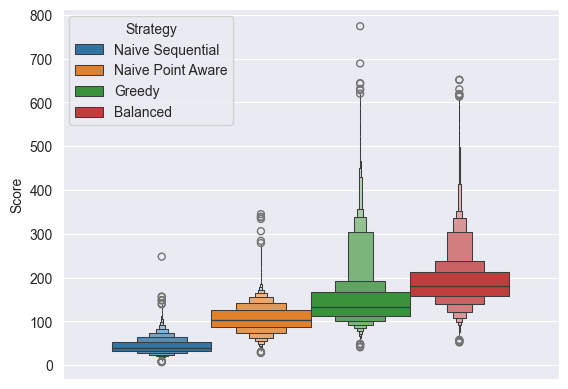

In [62]:
import seaborn as sns
sns.set_style('darkgrid')
sns.boxenplot(data=df, y='Score', hue='Strategy')

In [63]:
df[df['Strategy'] == 'Naive Sequential'].describe()

,Score,Num Yahtzees
count,100000.000000,100000.000000
mean,44.068010,0.010200
std,17.013496,0.100777
min,7.000000,0.000000
25%,32.000000,0.000000
50%,40.000000,0.000000
75%,53.000000,0.000000
max,248.000000,2.000000


In [64]:
df[df['Strategy'] == 'Naive Point Aware'].describe()

,Score,Num Yahtzees
count,100000.000000,100000.000000
mean,107.075890,0.010140
std,29.262628,0.100982
min,28.000000,0.000000
25%,87.000000,0.000000
50%,104.000000,0.000000
75%,127.000000,0.000000
max,345.000000,2.000000


In [65]:
df[df['Strategy'] == 'Greedy'].describe()

,Score,Num Yahtzees
count,100000.000000,100000.000000
mean,152.072700,0.522230
std,66.732123,0.703172
min,41.000000,0.000000
25%,112.000000,0.000000
50%,133.000000,0.000000
75%,167.000000,1.000000
max,774.000000,6.000000


In [66]:
df[df['Strategy'] == 'Balanced'].describe()

,Score,Num Yahtzees
count,100000.00000,100000.000000
mean,190.93937,0.435310
std,56.41333,0.648475
min,52.00000,0.000000
25%,159.00000,0.000000
50%,182.00000,0.000000
75%,213.00000,1.000000
max,652.00000,5.000000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset =

<Axes: xlabel='Score', ylabel='Count'>

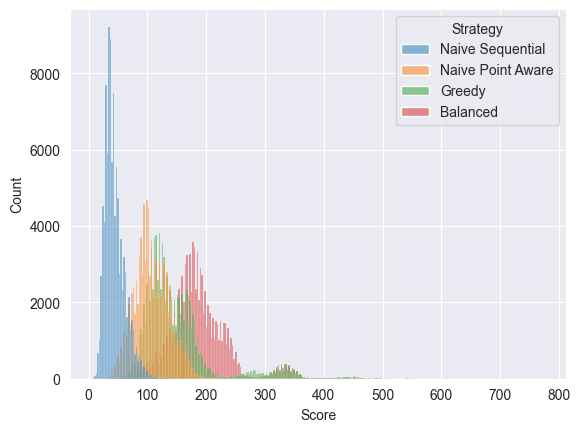

In [67]:
sns.histplot(data=df, x='Score', hue='Strategy')

<Axes: ylabel='Num Yahtzees'>

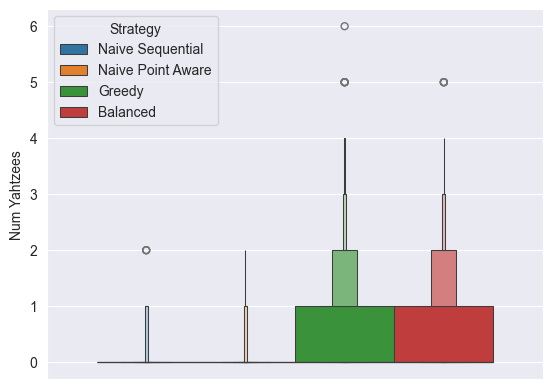

In [68]:
import seaborn as sns
sns.set_style('darkgrid')
sns.boxenplot(data=df, y='Num Yahtzees', hue='Strategy')

In [27]:
def parallel_games_diff_strats(cards, strats):
    while not any([card.is_full() for card in cards]):
        main_roll = roll_dice(5)
        for card, strat in zip(cards, strats):
            if strat == 'Naive Sequential':
                roll = main_roll.copy()
                available_category = choose_available_category_naive(card)
                card.update_score(roll, available_category)
            elif strat == 'Naive Point Aware':
                roll = main_roll.copy()
                scores = card.check_potential_scores(roll)
                sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
                flag = True
                # iterate through possible point-scoring categories
                for category, category_score in sorted_scores:
                    if card.scores[category] is None:
                        card.update_score(roll, category)
                        flag = False
                        break
                # if no opportunity to score points, take a 0 in the first available category on the scorecard
                if flag:
                    available_category = choose_available_category_naive(card)
                    card.update_score(roll, available_category)
            elif strat == 'Greedy':
                roll = main_roll.copy()
                for i in range(2):
                    roll = keep_highest_mode(roll)
                    scores = card.check_potential_scores(roll)
                    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
                flag = True
                # iterate through possible point-scoring categories
                for category, category_score in sorted_scores:
                    if card.scores[category] is None:
                        card.update_score(roll, category)
                        flag = False
                        break
                # if no opportunity to score points, take a 0 in the first available category on the scorecard
                if flag:
                    available_category = choose_available_category_naive(card)
                    card.update_score(roll, available_category)
            elif strat == 'Balanced':
                roll = main_roll.copy()
                for i in range(2):
                    if card.scores['Small Straight'] is None or card.scores['Large Straight'] is None:
                        roll = keep_straight_or_mode(roll)
                    else:
                        roll = keep_highest_mode(roll)
                scores = card.check_potential_scores(roll)
                sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
                flag = True
                # iterate through possible point-scoring categories
                for category, category_score in sorted_scores:
                    if card.scores[category] is None:
                        card.update_score(roll, category)
                        flag = False
                        break
                # if no opportunity to score points, take a 0 in the first available category on the scorecard
                if flag:
                    available_category = choose_available_category_naive(card)
                    card.update_score(roll, available_category)

    return [card.get_total_score() for card in cards], [card.yahtzees for card in cards]

N = 10000
parallel_sims_scores = []
parallel_sims_yahtzees = []
strats = ['Naive Sequential', 'Naive Point Aware', 'Greedy', 'Balanced']
for i in tqdm(range(N)):
    cards = [Yahtzee(), Yahtzee(), Yahtzee(), Yahtzee()]
    scores, yahtzees = parallel_games_diff_strats(cards, strats)
    parallel_sims_scores.append(scores)
    parallel_sims_yahtzees.append(yahtzees)

parallel_sim_scores_df = pd.DataFrame(parallel_sims_scores, columns = strats)
parallel_sim_yahtzees_df = pd.DataFrame(parallel_sims_yahtzees, columns = strats)
parallel_sim_scores_df

100%|██████████| 10000/10000 [00:17<00:00, 568.66it/s]


,Naive Sequential,Naive Point Aware,Greedy,Balanced
0,55,142,185,210
1,64,85,109,188
2,53,68,93,190
3,40,58,170,179
4,44,88,101,88
...,...,...,...,...
9995,24,136,165,156
9996,51,133,185,203
9997,46,62,108,144
9998,40,98,176,143


#### Brute Force Approach

In [41]:

from itertools import product

def all_dice_rolls(num_dice, num_sides=6):
  """
  This function generates all possible dice rolls for a given number of dice.

  Args:
      num_dice: The number of dice to roll.
      num_sides: The number of sides on each die (default 6).

  Returns:
      A list of lists, where each inner list represents a single dice roll.
  """
  # Use product to generate all combinations of outcomes for each die
  possible_outcomes = product(range(1, num_sides + 1), repeat=num_dice)
  return list(possible_outcomes)

# Example usage with 5 dice
dice_rolls = all_dice_rolls(5)
rolls = []
for dice_roll in dice_rolls:
  rolls.append(sorted(dice_roll))

rolls[3200:3205]

[[3, 3, 3, 5, 6],
 [3, 3, 4, 5, 6],
 [3, 3, 5, 5, 6],
 [3, 3, 5, 6, 6],
 [1, 1, 3, 3, 6]]

In [42]:
def get_all_possible_scores(roll):
    scores = {}
    if sum([dice for dice in roll if dice == 1]) > 0:
        scores["Ones"] = sum([dice for dice in roll if dice == 1])
    if sum([dice for dice in roll if dice == 2]) > 0:
        scores["Twos"] = sum([dice for dice in roll if dice == 2])
    if sum([dice for dice in roll if dice == 3]) > 0:
        scores["Threes"] = sum([dice for dice in roll if dice == 3])
    if sum([dice for dice in roll if dice == 4]) > 0:
        scores["Fours"] = sum([dice for dice in roll if dice == 4])
    if sum([dice for dice in roll if dice == 5]) > 0:
        scores["Fives"] = sum([dice for dice in roll if dice == 5])
    if sum([dice for dice in roll if dice == 6]) > 0:
        scores["Sixes"] = sum([dice for dice in roll if dice == 6])
    if self._check_n_of_a_kind(roll, 3):
        scores["Three of a Kind"] = sum(roll) if self._check_n_of_a_kind(roll, 3) else 0
    if self._check_n_of_a_kind(roll, 4):
        scores["Four of a Kind"] = sum(roll)
    if self._check_full_house(roll):
        scores["Full House"] = 25
    if self._check_straight(roll, 4):
        scores["Small Straight"] = 30
    if self._check_straight(roll, 5):
        scores["Large Straight"] = 40
    if self._check_n_of_a_kind(roll, 5):
        scores["Yahtzee"] = 50
    scores["Chance"] = sum(roll)
    return scores

{'Threes': 9, 'Fives': 5, 'Sixes': 6, 'Three of a Kind': 20, 'Chance': 20}

In [39]:
dice_rolls[np.random.choice(range(len(dice_rolls)), 1)[0]]

(3, 6, 1, 4, 5)